In [2]:
import tensorflow; import keras

Using TensorFlow backend.


In [3]:
tensorflow.__version__

'1.2.0'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import sys
import os
import csv
%matplotlib inline

In [5]:
os.environ['CUDA_VISIBLE_DEVICES'] = "3"

In [6]:
VAL_PATH = "data/images/val/"
# val_names = os.listdir(VAL_PATH)
# len(val_names), val_names

In [7]:
# category names
cat_num_to_name = {}

CATEGORIES_PATH = "development_kit/data/categories.txt"
with open(CATEGORIES_PATH, 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        cat_num_to_name[int(row[1])] = row[0]

cat_num_to_name

{0: '/a/abbey',
 1: '/a/airport_terminal',
 2: '/a/amphitheater',
 3: '/a/amusement_park',
 4: '/a/aquarium',
 5: '/a/aqueduct',
 6: '/a/art_gallery',
 7: '/a/assembly_line',
 8: '/a/auditorium',
 9: '/b/badlands',
 10: '/b/bakery/shop',
 11: '/b/ballroom',
 12: '/b/bamboo_forest',
 13: '/b/banquet_hall',
 14: '/b/bar',
 15: '/b/baseball_field',
 16: '/b/bathroom',
 17: '/b/beauty_salon',
 18: '/b/bedroom',
 19: '/b/boat_deck',
 20: '/b/bookstore',
 21: '/b/botanical_garden',
 22: '/b/bowling_alley',
 23: '/b/boxing_ring',
 24: '/b/bridge',
 25: '/b/bus_interior',
 26: '/b/butchers_shop',
 27: '/c/campsite',
 28: '/c/candy_store',
 29: '/c/canyon',
 30: '/c/cemetery',
 31: '/c/chalet',
 32: '/c/church/outdoor',
 33: '/c/classroom',
 34: '/c/clothing_store',
 35: '/c/coast',
 36: '/c/cockpit',
 37: '/c/coffee_shop',
 38: '/c/conference_room',
 39: '/c/construction_site',
 40: '/c/corn_field',
 41: '/c/corridor',
 42: '/c/courtyard',
 43: '/d/dam',
 44: '/d/desert/sand',
 45: '/d/dining_

In [8]:
filename_to_category = {}
# val_labels = []

# use csv reader to construct dictionary between filenames and category.
VAL_LABEL_PATH = "development_kit/data/val-mine.txt"
with open(VAL_LABEL_PATH, 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        filename_to_category[row[0]] = int(row[1])
#         val_labels.append(int(row[1]))
        
filename_to_category

{'00006516.jpg': 6,
 '00007529.jpg': 29,
 '00000462.jpg': 89,
 '00004474.jpg': 34,
 '00006592.jpg': 34,
 '00005537.jpg': 94,
 '00001849.jpg': 78,
 '00006159.jpg': 6,
 '00005842.jpg': 89,
 '00006273.jpg': 50,
 '00006787.jpg': 63,
 '00006073.jpg': 67,
 '00005830.jpg': 26,
 '00000437.jpg': 73,
 '00008155.jpg': 73,
 '00003551.jpg': 36,
 '00002175.jpg': 65,
 '00001887.jpg': 96,
 '00002461.jpg': 81,
 '00001192.jpg': 96,
 '00009083.jpg': 88,
 '00009548.jpg': 80,
 '00005883.jpg': 9,
 '00002095.jpg': 18,
 '00004554.jpg': 18,
 '00003081.jpg': 59,
 '00007842.jpg': 91,
 '00008714.jpg': 68,
 '00002622.jpg': 19,
 '00000157.jpg': 30,
 '00007683.jpg': 75,
 '00009593.jpg': 38,
 '00002993.jpg': 63,
 '00006922.jpg': 22,
 '00001709.jpg': 2,
 '00002547.jpg': 69,
 '00008017.jpg': 31,
 '00000703.jpg': 35,
 '00004834.jpg': 3,
 '00007168.jpg': 17,
 '00000883.jpg': 36,
 '00002312.jpg': 41,
 '00004538.jpg': 74,
 '00001826.jpg': 24,
 '00000741.jpg': 16,
 '00005654.jpg': 37,
 '00006378.jpg': 48,
 '00003553.jpg': 5

In [9]:
def show(path, img_name):
    img_path = path + img_name
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(cat_num_to_name[filename_to_category[img_name]])
    print(filename_to_category[img_name])

88


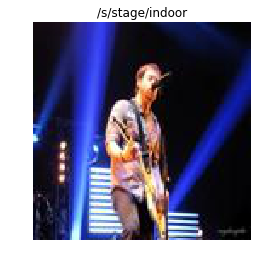

In [10]:
fname = '00000011.jpg'
category = filename_to_category[fname]
show(VAL_PATH, fname)

# Make Model

In [11]:
# Keras Imports
from keras.layers import Activation, Reshape, Dropout, Dense,Flatten
from keras.layers import AtrousConvolution2D, Convolution2D, MaxPooling2D, ZeroPadding2D, Conv2DTranspose
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils import plot_model
import keras.preprocessing.image as kimage
import keras.backend
keras.backend.set_image_data_format('channels_last')

In [12]:
def makemodel():
    model = Sequential()
    model.add(Convolution2D(filters=128,kernel_size=(3, 3), input_shape=(128,128,3), padding='same'))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Convolution2D(kernel_size = (3,3), filters = 128, padding='same'))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    #model.add(Flatten())
    model.add(Convolution2D(filters=64, kernel_size=(1,1)))
    model.add(Dropout(rate= 0.5))
    model.add(Flatten())
    model.add(Dense(units=1000))
    model.add(Dense(units=1000))
    model.add(Dense(units=100))
    #model.add(Reshape((-1,10)))
    model.add(Activation('softmax'))
    return model

In [13]:
import h5py
from DeepLearningModels import vgg19
model = vgg19.VGG19(weights=None, classes=100)

print(model.summary())

# compile the model with crossentropy loss function.
model.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# Put Data into np arrays

In [14]:
def make_one_hot(label):
    a = [0] * 100
    a[label] = 1
    return np.array(a)

In [16]:
all_vals = []
labels = []

for filename, label in filename_to_category.items():
    img_path = VAL_PATH + filename
    a = Image.open(img_path)
    a = a.resize((224, 224))
    all_vals.append(np.asarray(a))
    labels.append(make_one_hot(label))

all_vals = np.array(all_vals)
labels = np.array(labels)

71


'/m/market/outdoor'

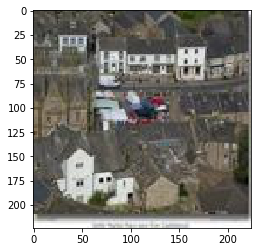

In [17]:
import random
idx = random.randint(0,99)
print(idx)
plt.imshow(all_vals[idx])
cat_num_to_name[np.argmax(labels[idx])]

# Train the model

In [18]:
model.fit(all_vals, labels, epochs=10, batch_size=64)

Epoch 1/10
10000/10000 [==============================] - 252s - loss: 15.8881 - acc: 0.0097   
Epoch 2/10
10000/10000 [==============================] - 249s - loss: 15.9569 - acc: 0.0100   
Epoch 3/10
10000/10000 [==============================] - 249s - loss: 15.9569 - acc: 0.0100   
Epoch 4/10
10000/10000 [==============================] - 249s - loss: 15.9569 - acc: 0.0100   
Epoch 5/10
10000/10000 [==============================] - 249s - loss: 15.9569 - acc: 0.0100   
Epoch 6/10
10000/10000 [==============================] - 249s - loss: 15.9569 - acc: 0.0100   
Epoch 7/10
10000/10000 [==============================] - 248s - loss: 15.9569 - acc: 0.0100   
Epoch 8/10
10000/10000 [==============================] - 249s - loss: 15.9569 - acc: 0.0100   
Epoch 9/10
10000/10000 [==============================] - 248s - loss: 15.9569 - acc: 0.0100   
Epoch 10/10
10000/10000 [==============================] - 248s - loss: 15.9569 - acc: 0.0100   


In [ ]:
import h5py

In [ ]:
model.save('my_model.h5')

In [ ]:
result = model.evaluate(all_vals, labels, batch_size=128)
print("Loss on valid set:"  + str(result[0]) + " Accuracy on valid set: " + str(result[1]))